# HW 6: Natural and Unnatural Selection




## Reading this week

The reading for this week is:
   * Section 5.4 (nested for loops)
   * Section 5.5 (while loops)
   * Chapter 8 (Indexing)


## Drift and Natural Selection in Diploid Organisms

### `random` thoughts...

Recall that the `random` package contains a function called
`random.choice` that takes a list as input and returns a random item from that list.

`random.choice` can also take a _string_ as input and it chooses a random symbol in that string. You'll use this in the current homework to choose an allele at random from a diploid pair.

Take a look at this example to see how this works. Run 🏃 it several times to see it in action.

Notice that we're choosing two parents, but they might be the _same_ parent chosen _twice_. While this doesn't make sense biologically, we allow for this in our simulations because the probability of choosing the same parent twice is very small when our population is large and the impact in our computational experiments is therefore negligible. Often times, computational 💻 or mathematical models make simplifying assumptions just like this one because they make things easier and don't matter for the issue that we're seeking to study.

In [1]:
import random

population = ["AA", "AB", "BA", "BB"]  # A population of four diploid organisms!
parent1 = random.choice(population)    # Choose a parent at random
parent2 = random.choice(population)    # Choose another parent at random
print("Parent 1 is", parent1)
print("Parent 2 is", parent2)
allele1 = random.choice(parent1)
allele2 = random.choice(parent2)
print("Allele 1 is", allele1)
print("Allele 2 is", allele2)
offspring = allele1 + allele2
print("Offspring is", offspring)

Parent 1 is AA
Parent 2 is BB
Allele 1 is A
Allele 2 is B
Offspring is AB


The next ingredient is one that we've used before: It's the use of `random.uniform` to make a random choice that is not _necessarily_ a 50-50 (or other uniformly distributed set of probabilities) choice.

Recall that `random.uniform(0, 1)` generates a random decimal number between 0 and 1. So, for example, if we want to simulate an unfair coin that has probability of 0.8 of coming up heads (and thus 0.2 of coming up tails), we can do it like in the code example below. Try it out! Then, try changing the 0.8 to a larger or smaller value. If you make it larger, there is a higher probability of heads. If you make it smaller, there is a smaller probability of heads.

In [3]:
import random

for i in list(range(10)):
  if random.uniform(0, 1) < 0.2:
    print("Heads")
  else:
    print("Tails")

Heads
Tails
Tails
Tails
Tails
Heads
Tails
Tails
Tails
Tails


### Natural selection in a diploid population

In HW 4, you simulated a population of haploid organisms 🧬 (e.g., bacteria) under natural selection. **We encourage you to pause here and go back to look what you did on that assignment because this next part builds on those ideas.** Refreshing your memory on that simulation will make this one more intuitive.

In a nutshell, you wrote a simulation for a population of organisms with two alleles for a particular gene. We called those alleles `A` and `B`. Organisms with the `A` allele have a probability `p` of surviving to reproduce (that's the **fitness** of the organism) and organisms with the `B` allele have a probability `q` of surviving to reproduce. (Remember, probabilities are numbers between 0 and 1.)

Our simulation worked like this. Starting with a population `currentGen` of organisms, represented by a list of `A`'s and `B`'s, we repeated (that rhymes with `for` loop) the following process:
   1. Call a helper function called `surviveToReproduce` that takes the current population (`currentGen`) and fitness probabilities `p` and `q` as input and returns a new list of the organisms that survived to reproduce. Call that list `survivors`.
   2. Next, we used `random.choices` to select from the `survivors` the next generation. The size of that population is equal to the size of the original population (aka, the "carrying capacity").
  
That's the basic idea! In order to also plot the fraction of the population that is `A`'s at each generation, we also kept a list called `fracAs` and, in each iteration of the simulation, we computed the fraction of `A`'s in the `currentGen` population and added that fraction to the end of the `fracAs` list. (We could have done this with `B`'s instead, but since whatever is not an `A` is a `B`, we arbitrarily chose to track the fraction of the population that is `A`'s.)




#### From haploid to diploid!

Now, we're going to extend what you did for natural selection in haploid organisms to diploid organisms! 🧬🧬

Consider a population of diploid organisms with two alleles for a particular gene. We'll again call those alleles `A` and `B`. (Note that we are just considering one gene in these organisms and we are only considering two alleles for that gene. In reality, an organism will have many genes and each of those genes can have many alleles.)

Each organism in our model is therefore either:
   * `AA` (homozygous A)
   * `BA` or `AB` (heterozygous - these two are effectively the same!)
   * `BB` (homozygous B)

Let the fitness (probability of surviving to reproduce) be:
   * `pAA` (for `AA` homozygous)
   * `pAB` (for `AB` or `BA` heterozygous)
   * `pBB` (for `BB` homozygous)

Those probabilities are analogous to the probabilities `p` and `q` that we used in the haploid simulation.

#### `surviveToReproduce`

**Part 1**

Here's the code for `surviveToReproduce`. Lines 13, 16, and 19 are missing. It's your task to add them in. (**Hint:** Those three lines of code are identical.)

Notice that when you run this code, you will get different answers each time you run it because there's randomness.



In [6]:
import random

random.seed(1)

# Takes a population list of organisms (each is "AA", "AB", "BA", or "BB")
# and fitnesses as input and returns a list of organisms that survive
# to reproduce in the next generation.
def surviveToReproduce(population, pAA, pAB, pBB):
  survivors = []
  for organism in population:
    if organism == "AA":
      if random.uniform(0, 1) < pAA:
        survivors.append(organism)
    elif organism == "AB" or organism == "BA":
      if random.uniform(0, 1) < pAB:
        survivors.append(organism)
    else:
      if random.uniform(0, 1) < pBB:
        survivors.append(organism)
  return survivors

testPop = 5 * ["AA"] + 5 * ["AB"] + 5 * ["BB"]
print("Initial population is", testPop)
survivors = surviveToReproduce(population = testPop, pAA = 0.9, pAB = 0.5, pBB = 0.3)
print("Survivors are", survivors)

Initial population is ['AA', 'AA', 'AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'AB', 'AB', 'BB', 'BB', 'BB', 'BB', 'BB']
Survivors are ['AA', 'AA', 'AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'BB']


Because there's randomness here, it's hard to compare your results to those of a known correct solution. To test your code, you can uncomment line 4 (by removing the `#`). That command, `random.seed(1)`, will make sure that your code uses the same "random" choices each time you run the code cell. We use this for testing our code, but generally comment that line (put the `#` back in front of that line) when doing computational experiments.

In this case, if you uncomment that line so that `random.seed(1)` is on that line without the `#` comment symbol, then you should get this when you run the code cell above with your added code:

<pre>
Initial population is ['AA', 'AA', 'AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'AB', 'AB', 'BB', 'BB', 'BB', 'BB', 'BB']
Survivors are ['AA', 'AA', 'AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'BB']
</pre>

**Part 2**

Notice that quite a few `AA` organisms survived to reproduce but fewer `AB` organisms and ever fewer  `BB` organisms survived to reproduce. Why did that happen in this particular case?

<font color="SteelBlue">**Because the values that the variables (pAA, pAB, and pBB) represent the fitness of those organisms. We generate a random value between 0 and 1, and if it is less than the fitness, (meaning the organism survives), we add it to the list of survivors.**</font>


#### Creating the next generation

**Part 3**

Our next task is to write another helper function called `createNextGeneration(population, pAA, pAB, pBB)`. In a nutshell, it's job is to take a current `population` (a list of strings of `AA`, `AB`, `BA`, and `BB` organisms) and `return` the next generation. This process is just a bit more involved than in the haploid case, but it's just a few steps.

In particular, in our earlier haploid simulation, we used `random.choices` to build the next generation in one line. But sexual reproduction is more complicated, and we'll need to do a bit more work to go from one generation to the next. We'll need to repeatedly use `random.choice` to choose two parents and then use `random.choice` _again_ to choose an allele from each parent.

  1. First, we'll create an empty accumulator list called `nextGeneration`. We've provided that on line 6 in the code cell below. This is the "top" bun in our sandwich metaphor. Our goal is to build a new next generation population of the same size as our current population. So, line 7 computes that population size `popSize`.
  2. Next, we call the `surviveToReproduce` function to give us back the population (list) of `survivors`.
  3. Next, we loop (how many times?) and do the following:
     * Choose a parent at random from the `survivors` list using `random.choice` (not `random.choices`, because we're choosing just one thing). Call this `parent1`.
     * Choose another parent at random from the `survivors` list and call it `parent2`.
     * **Be sure to choose <font color = red>both</font> parents at random <font color = red>before</font> moving on to the next step.** (If you don't do this, your results will look different from the results that we offer you below to check your answers.)
     * Note that `parent1` is a string of the form `AA`, `AB`, `BA`, or `BB`. Choose an allele at random from `parent1`. Call it `allele1`. This is the allele that this parent will contribute (say, in the egg).
     * Choose an allele at random from `parent2`. Call it `allele2`. This is the allele that this parent will contribute will contribute (say, in the sperm).
     * Make a new diploid string that is the "sum" of `allele1` and `allele2`.
     * Add that diploid string to the `nextGeneration` list.
  4. Return the `nextGeneration` list.


In [9]:
# Takes a population list of organisms (each is "AA", "AB", "BA", or "BB")
# and fitnesses as input and returns the next generation.
random.seed(1)

def createNextGeneration(currentGen, pAA, pAB, pBB):
  nextGeneration = []
  popSize = len(currentGen)
  survivors = surviveToReproduce(population = currentGen, pAA = pAA, pAB = pAB, pBB = pBB)
  # Write the remaining code below. It's about 8 lines of code.
  nextGeneration = []
  for _ in list(range(popSize)):
    parent1 = random.choice(survivors)
    parent2 = random.choice(survivors)
    allele1 = random.choice(parent1)
    allele2 = random.choice(parent2)
    output = allele1 + allele2
    nextGeneration.append(output)
  return








testPop = 3 * ["AA"] + 3 * ["AB"] + 3 * ["BB"]
print("Initial population is", testPop)
nextGen = createNextGeneration(currentGen = testPop, pAA = 0.9, pAB = 0.5, pBB = 0.3)
print("Next generation is   ", nextGen)

Initial population is ['AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'BB', 'BB', 'BB']
Next generation is    ['AB', 'AB', 'AA', 'AA', 'AB', 'BA', 'BA', 'BA', 'BA']


If you uncomment line 3 (so that `random.seed(1)` is active) and run the code cell above, you should get
<pre>
Initial population is ['AA', 'AA', 'AA', 'AB', 'AB', 'AB', 'BB', 'BB', 'BB']
Next generation is    ['AB', 'AB', 'AA', 'AA', 'AB', 'BA', 'BA', 'BA', 'BA']
</pre>

#### Finally, the simulation!

**Part 4**

Now, you're ready to run the simulation which we've started below. It's missing just a bit of code on line 15 _and_ lines 19-21. You'll also need to add appropriate labels and a title for your plot (see lines 28-30).


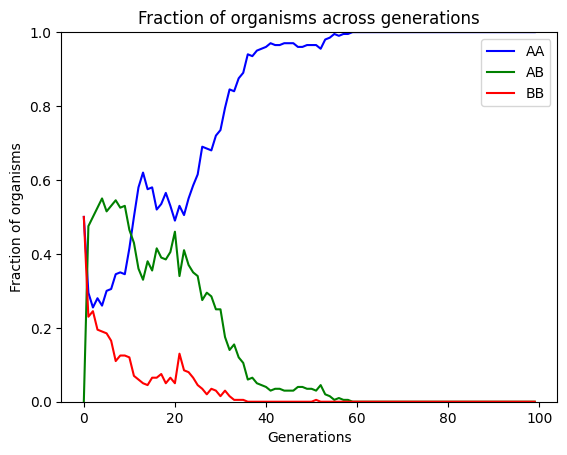

In [14]:
import matplotlib.pyplot as plt

# Takes a population list of organisms (each is "AA", "AB", "BA", or "BB")
# and fitnesses as input and simulate numGens generations.
# Plots the fraction of AA, AB/BA, BB alleles.
def simulate(currentGen, pAA, pAB, pBB, numGens):
  popSize = len(currentGen)
  # Just like in the haploid natural selection simulation, we keep
  # lists of the fraction of organisms of each type at each generation.
  # We need these lists in order to plot the frequencies at the end.
  # See lines 24-26 to see where these are getting plotted.
  fracAA = [] # Fraction of organisms that are AA
  fracAB = [] # Fraction of organisms that are AB or BA
  fracBB = [] # Fraction of organisms that are BB
  for _ in range(numGens):
    AAcount = currentGen.count("AA")
    ABcount = currentGen.count("AB") + currentGen.count("BA")
    BBcount = currentGen.count("BB")
    fracAA.append(AAcount / popSize)
    fracAB.append(ABcount / popSize)
    fracBB.append(BBcount / popSize)
    currentGen = createNextGeneration(currentGen = currentGen, pAA = pAA, pAB = pAB, pBB = pBB)  # Notice that we're making the nextGen right here!

  plt.plot(fracAA, color = "blue", label = "AA")
  plt.plot(fracAB, color = "green", label = "AB")
  plt.plot(fracBB, color = "red", label = "BB")
  plt.ylim(0, 1)
  plt.xlabel("Generations")
  plt.ylabel("Fraction of organisms")
  plt.title("Fraction of organisms across generations")
  plt.legend()
  plt.show()

scenario1 =  100 * ["AA"] + 100 * ["BB"]
simulate(currentGen = scenario1, pAA= 0.9, pAB = 0.8, pBB = 0.8, numGens = 100)

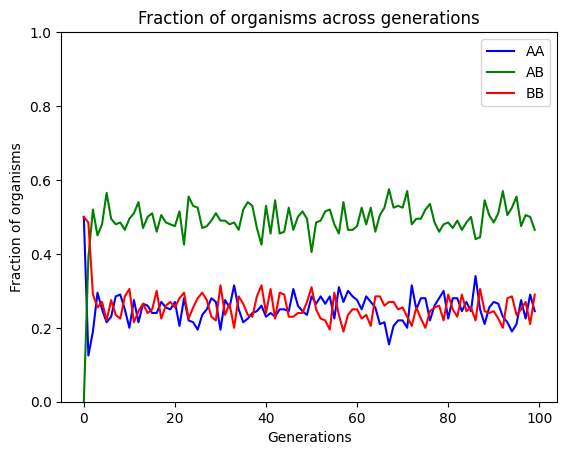

In [16]:
scenario2 =  100 * ["AA"] + 100 * ["BB"]
simulate(currentGen = scenario2, pAA= 0.1, pAB = 0.9, pBB = 0.1, numGens = 100)

### Interpreting the results

**Part 5**

In the code cell above, we used this scenario:
<pre>
scenario1 =  100 * ["AA"] + 100 * ["BB"]
simulate(currentGen = scenario1, pAA= 0.9, pAB = 0.8, pBB = 0.8, numGens = 100)
</pre>

Note the fraction of `AA` organisms, `AB` (which also includes `BA`), and `BB` organisms. Describe what you observed in this plot and then explain why this makes sense based on what we understand about natural selection.

<font color="SteelBlue">**In the beginning, there is an equal number of AA and BB organisms. However, because AA has a higher fitness, the fraction of AA organisms increase over time, eventually causing the AB/BA and BB organisms to go extinct.**</font>

**Part 6** (10 points)

Recall that the beta-globin gene has two alleles, let's call them A (normal) and B (mutant) for short. People who are homozygous AA don't have sickle-cell but they are very susceptible to malaria, so fitness is "low" (they may get malaria and not survive to reproduce).

People who are homozygous BB get sickle-cell disease, so fitness is "low" (they may get that disease and not survive to reproduce).

People who are heterozygous AB (same as BA) are protected from both diseases, so their fitness is "high".

To simulate this, replace the `scenario1` with `scenario2`:
<pre>
scenario2 =  100 * ["AA"] + 100 * ["BB"]
simulate(currentGen = scenario2, pAA= 0.1, pAB = 0.9, pBB = 0.1, numGens = 100)
</pre>

  * What do you notice about the fraction of `AA`, `AB` (which includes `BA`), and `BB` organisms?
  
  <font color="SteelBlue">**The percent of organisms that are AB hover roughly around the 50% mark, while AA and BB both are around 25% each.**</font>
  
  * Do any of those genotypes fix?

  <font color="SteelBlue">**No, none of the genotypes fix. Despite AB having the highest fitness, it cannot fix. This is because AA and BB organisms will still be in the population due to the random selection of 1 allele from each organism, (A or B). Since the highest fitness organism is AB, when two AB organisms reproduce with eachother it is a 25% chance of either AA or BB being the result.**</font>

  * This is strange! Carefully explain why these results make sense. Use malaria and sickle-cell disease as part of your explanation. This may require a few sentences.

  <font color="SteelBlue">**People with AA (normal blood cells) are healthy, but die from malaria. People with BB (sickle cell) do not get malaria, but will suffer from the effects of sickle cell. People with AB are both resistant to malaria and do not have sickle cell. However, despite AB having the highest fitness, it is still possible that two people both with AB can still have children who have AA or BB, so both alleles stay and will not get fixed.**</font>

### CRISPR Gene Drives: Unnatural Selection

Diminutive Island 🌴 is a very <font size=1>small</font> island with a <font size=5>big</font> problem.
The mice 🐁 on the island carry a zoonotic disease (a disease spread from one species to another - in this case, mice to humans). Mice that that carry at least one copy of the "W" allele of a specific gene can spread the disease.

The residents of the island are exploring the possibility of using a CRISPR-based gene drive to combat the disease. By the end of this lab, you'll be able to use your own computational model to advise them about the viability of using a gene drive to combat this disease.

**Part 7**

Before we get started, let's review _some_ of the possible outcomes that can arise when a pair of diploid parents mate. Each parent has two alleles. The initial populations is WW (wild type homozygous) and DD (engineered drive type homozygous). In each line below, replace the red text <font color=red>??</font> with the correct answer.

Note that we consider DR and RD as the same, WD and DW as the same, etc. The important thing is which alleles are present, but not the order of the alleles. For simplicity, we use alphabetical order when writing these down, so we would always write DR rather than RD and would write DW rather than WD.

   * DD mates with DD. Offspring is <font color=red>DD</font>
   * WW mates with WW. Offspring is <font color=red>WW</font>
   * DD mates with WW. The two possible outcomes are:
      * If HDR is used: <font color=red>DD</font>
      * If NHEJ is used: <font color=red>DR</font>
   * DD mates with DR. D's and R's don't get cut. So, there won't be any repair. But, the two possible outcomes are:
      * Outcome 1: <font color=red>DD</font>
      * Outcome 2: <font color=red>DR</font>
   * DR mates with WW. The possible outcomes are: (_if a repair occurs, indicate which repair is involved in that outcome_):
      * <font color = red> DD (HDR repair)</font>
      * <font color = red> DR (NHEJ repair)</font>
      * <font color = red> RW (no repair) </font>
   * DR mates with DR. The possible outcomes are (_if a repair occurs, indicate which repair is involved in that outcome_):
      * <font color = red> DD (no repair)</font>
      * <font color = red> DR (no repair)</font>
      * <font color = red> RR (no repair)</font>
   * RR mates with RR. Offspring is <font color=red>RR</font>

Whew! There are a lot of combinations and we didn't even do all of them here. Fortunately, your program will take care of these options without having to explicitly consider every possible combination as we started doing here.
   

### The `cutAndRepair` function!

The first function that we need to write is called `cutAndRepair(pair, probHDR)` ✂ 👷. It takes a pair "DW" or "WD" as input and simulates the "D" allele cutting the "W" and turning it into either a "D" (with probability `probHDR`) or else an "R".

For example, if we call `cutAndRepair(pair="DW", probHDR = 1.0)` we'll get back "DD" for sure because the drive allele will cause the "W" to get cut which will cause the "W" to get replaced by the "D" because HDR is being used. On the other hand,`cutAndRepair(pair = "DW", probHDR = 0.5)` will return either "DD" or "DR" with equal probability. Finally, `cutAndRepair(pair = "WD", probHDR = 0.9)` will return "DD" with probability 0.9 and "DR" with probability 0.1.

**Part 8**

In [17]:
import random

random.seed(46)

# Takes as input a pair "DW" or "WD" and simulates the CRISPR cut-and-repair
# process. It returns "DD" with probability probHDR and otherwise returns "DR"
def cutAndRepair(pair, probHDR):
  if random.uniform(0, 1) < probHDR:
    return "DD"
  return "DR"

# When running with random.seed(46) the following test will print
# DR  DD  DD  DR  DD  DD  DD  DR  DD  DD
for _ in list(range(10)):
  print(cutAndRepair(pair = "DW", probHDR = 0.7), " ", end = '')

DR  DD  DD  DR  DD  DD  DD  DR  DD  DD  

### The simulation!

Our goal 🥅 is to simulate CRISPR gene drives to explore how likely they are to work under different conditions. Such simulations are critically important for stakeholders, policy-makers, and scientists in making informed decisions.

Imagine that we have a population of diploid organisms represented as a list. For example, the initial population will have a small number of engineered "DD" drive organisms and, generally, a much larger number of "WW" wild type organisms. There are no "R" alleles in the first generation. This could represented in a list like this:

`population = ["DD", "DD", "DD", "WW", "WW", "WW", "WW"]`

As we've seen before, we can use this notation to construct two lists, the first of 3 DD's and the second of 4 WW's and then add them to together to get one list of 7 organisms.

`population = ["DD"] * 3 + ["WW"] * 4`

Of course, the 3 and 4 are just small numbers for the sake of example. Your simulation will allow *any* number of "DD" and "WW" organisms in the initial population.

**Part 9**

Your next step is to write a function
`nextGeneration(population, probHDR)`
that takes a population (represented as a list) of diploid strings (strings of the form "DD", "DR", "WW", etc.) and returns a list of diploid strings representing the next generation.
The output list representing the next generation will be the same size as the
given population.

This function also takes a value `probHDR` that represents the probability that a "DW" or "WD" offspring is "converted" to a "DD" offspring (rather than a "DR") offspring. That value is used by the `cutAndRepair` function that you wrote above and will use again here.

Here's how `nextGeneration(population, probHDR)` should work:
   1. Start with a new empty list called `nextGen` which is the list of organisms in the next generation. This is the list that you will return! (This is accumulating a list -- a pattern that we know and love! As usual, start by writing the first and last lines of code.)
   2. Define a box (variable) `n` that is the size (length) of the `population`. The next generation will have this same size.
   3. Repeat n times (for loop!) the following process:
      1. Choose two strings (organisms) from the `population`. Use `random.choice(population)` to choose one parent. Then use it again to choose the other parent. (This may end up choosing the same parent twice. As noted earliler, we won't worry about that.) **Be sure to choose <font color = red>both</font> parents at random <font color = red>before</font> moving on to the next step.** (If you don't do this, your output will look different than the sample answers that we provide you below.)
      2. Randomly choose one allele from the first parent and one from the second parent. Make a new string by combining those two alleles into one string of length 2. That is the pair of gametes for the offspring.
      3. If that pair is "DW" or "WD" then the D allele will cut and repair the W allele. So, send this "DW" or "WD" to the cut-and-repair function. What comes back from that function will be added on to the `nextGen` list.
      4. Otherwise (the pair is not "DW" nor "WD") then there is no cut-and-repair. So, we just add that offspring to the `nextGen` list.
   4. Finally, we return that new population as `nextGen`.


In [18]:
import random

random.seed(46) # Only for testing purposes

# Include your cutAndRepair function here, along with its contract.
# (Always keep the contracts with the functions!)


# Takes as input a population list of strings, each comprising two alleles
# and the probability probHDR that HDR will be used rather than NHEJ when
# a drive allele cuts a wild type allele. Returns a new population
# representing the next generation.
def nextGeneration(population, probHDR):
  nextGen = []
  # Add your code below!
  for _ in list(range(len(population))):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    allele1 = random.choice(parent1)
    allele2 = random.choice(parent2)
    output = allele1 + allele2

    if output == "DW" or output == "WD":
      output = cutAndRepair(output, probHDR)

    nextGen.append(output)
  return nextGen








  return nextGen

### Test code
population = ["DD"] * 2 + ["WW"] * 4  # Initial population is set here!

print("Perfect efficiency drive")
nextPopulation = nextGeneration(population = population, probHDR = 1)
print(nextPopulation)
print()

print("90% efficiency drive")
nextPopulation = nextGeneration(population = population, probHDR = 0.9)
print(nextPopulation)
print()

print("50% efficiency drive")
nextPopulation = nextGeneration(population = population, probHDR = 0.5)
print(nextPopulation)
print()

print("10% efficiency drive")
nextPopulation = nextGeneration(population = population, probHDR = 0.1)
print(nextPopulation)

Perfect efficiency drive
['DD', 'DD', 'WW', 'DD', 'DD', 'DD']

90% efficiency drive
['WW', 'DD', 'WW', 'DD', 'DD', 'DD']

50% efficiency drive
['WW', 'DD', 'DD', 'DR', 'DD', 'DD']

10% efficiency drive
['WW', 'DR', 'DR', 'DR', 'WW', 'DR']


This is what you will see when using the random seed set at 46. (This assumes that you first chose `parent1` and `parent2` and then chose `allele1` from `parent1` and `allele2` from `parent2` as we suggested in the instructions.)
<pre>
Perfect efficiency drive
['DD', 'DD', 'WW', 'DD', 'DD', 'DD']

90% efficiency drive
['WW', 'DD', 'WW', 'DD', 'DD', 'DD']

50% efficiency drive
['WW', 'DD', 'DD', 'DR', 'DD', 'DD']

10% efficiency drive
['WW', 'DR', 'DR', 'DR', 'WW', 'DR']
</pre>

**Notice** that when the efficiency (aka `probHDR`) is high, the resistant allele is rarely or barely present in the next generation. But, when the efficiency is low, NHEJ repair is frequent and the resistant allele sneaks into the population.

**Part 10**

The `nextGeneration` function that you just wrote simulates _one generation_ of the gene drive. The next function will simulate _multiple generations_, just as we did last week in our genetic drift and natural selection simulations. <font color="Chocolate">After all, we're interested in understanding how the drive gene spreads over multiple successive generations!</font>

The next function that you'll write is called `trial(population, probHDR, numGens)`. It takes as input a list representing a population of diploid strings (e.g., "WW", "DD", etc.), `probHDR`, and the number of generations that we wish to simulate.

Here's what it does:

   1. Repeat `numGens` times the following:
      1. Call `nextGeneration` to get the population of the next generation.
      2. Put that new population back into the `population` box.
   2. Return the `population` - that's the population after `numGens` generations!

Copy-and-paste your `cutAndRepair` and your `nextGeneration` code from the cell above into the cell below. Then, add the code for your `trial` function. It will be just around 3 lines of code because we're using a modular design that lets us leverage functions that you've already written!

In [19]:
import random

random.seed(46) # Only for testing purposes

# Paste your cutAndRepair and nextGeneration functions here, along
# with their contracts. (Always keep the contracts with the functions!)

# Performs a trial of numGens generations of the gene drive and
# returns the population that results after numGens generations
def trial(population, probHDR, numGens):
  for _ in range(numGens):
    population = nextGeneration(population, probHDR)
  return population


### Test code
population = ["DD"] * 5 + ["WW"] * 100 # Initial population is set here!

print("Perfect efficiency drive, 100 generations")
finalPopulation = trial(population = population, probHDR = 1.0, numGens = 100)
print(finalPopulation)
print("Fraction of DD in population", finalPopulation.count("DD")/len(population))
print()

print("90% efficiency drive, 100 generations")
finalPopulation = trial(population = population, probHDR = 0.9, numGens = 100)
print(finalPopulation)
print("Fraction of DD in population", finalPopulation.count("DD")/len(population))
print()

print("50% efficiency drive, 100 generations")
finalPopulation = trial(population = population, probHDR = 0.5, numGens = 100)
print(finalPopulation)
print("Fraction of DD in population", finalPopulation.count("DD")/len(population))
print()

print("10% efficiency drive, 100 generations")
finalPopulation = trial(population = population, probHDR = 0.1, numGens = 100)
print(finalPopulation)
print("Fraction of DD in population", finalPopulation.count("DD")/len(population))

Perfect efficiency drive, 100 generations
['DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD']
Fraction of DD in population 1.0

90% efficiency drive, 100 generations
['DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DR', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'DD', 'D

Using `random.seed(46)`, running the code above should result in the fraction of DD in the population being 1.0 the first time, then 0.933 , then 0.038 (first three digits after the decimal), and then 0.0. (Python will show more decimal places.)

**Part 11**

The code cell above performs a test where the initial population has 5 engineered "DD" organisms and 100 wild type "WW" organisms. Let's see the extent to which the "DD" drive organisms spread in the population as a function of the efficiency of the drive.

  * What did you observe about the fraction of "DD"s in the population after 100 generations as the drive efficiency decreases? <br>
  <font color="SteelBlue">**As the drive efficiency decreases, so does the fraction of DD organisms after 100 generations. This is because less DW organisms will convert to DD. **</font>

  * Next, consider an experiment in which we release 5 engineered "DD" organisms into a population of 1000 wild type "WW" organisms with a drive efficiency of 90%. What fraction of the population is "DD", and therefore unable to confer malaria, after 100 generations. <br>
  <font color="SteelBlue">**After 100 generations, the population would be very very likely to be all DD because of how many iterations we go through. Because the drive efficnency is 90%, the D allele will quickly dominate the population.**</font>

### The Simulation!

Finally, we're ready for the main event! 🎪 This is where we develop a computational experiment that performs many trials of the process that you just developed in the code cell above. We've seen this concept many times before - an experiment comprises many trials. This is important because each trial may be different and we want to see the trends over many trials.

In this simulation, we will be tracking the number (or fraction) of D, R, and W alleles in the population, rather than the number of pairs of alleles. For example, in a population `["DD", "DR", "WW"]` we have 3 D's, 1 R, and 2 W's. So, we have a fraction of 3/6 D's, 1/6 R's, and 2/6 W's. Our goal, of course, is to have many DDs. But, an alternative viewpoint is that we'd like to have a very small fraction of R's and W's in the population.

**Part 12**

Check out this short function below. It will be useful to us. Run it to figure out what it does, and then write the contract for this function. Your contract should explain what the inputs are and what the function returns.

In [20]:
# Write the contract here! (Add additional lines if needed!)
#
# Counts how many times a symbol appears in a list of organisms.
def countSym(symbol, list):
  total = 0
  for organism in list:
    total = total + organism.count(symbol)
  return total

print(countSym(symbol = "W", list = ["DD", "WW", "DR", "DR"]))
print(countSym(symbol = "D", list = ["DD", "WW", "DR", "DR"]))
print(countSym(symbol = "R", list = ["DD", "WW", "DR", "DR"]))

2
4
2


**Part 13**

Next,copy-and-paste the `cutAndRepair`, `nextGeneration`, `trial`, and `countSym` function, along with their contracts, into the code cell below. (Always keep the contracts with the functions!)

Rename your `trial` function to `trialFreqs` and modify that function so that it keeps three lists: one called `wildFrequencies`, one called `driveFrequencies`, and one called `resistFrequencies`. All three lists should start as empty lists.

Here's what the function needs to do:

  1. Repeat `numGens` times the following:

      a. Find the number of "W" alleles in all of the organisms in this population. Call the `countSym` function to do that! That's a large number. We really want to know the _fraction_ of alleles in the population that are "W". So, divide the number that you just got from `countSym` by the total number of alleles in the population. <font color="DodgerBlue">(Remember: each organism in the population is diploid -- it has **two** alleles!)</font>
      Add that number to the end of the `wildFrequencies` list. That's recording how many "W" alleles are in the population in this generation.
      
      b. Now do the same for "D" alleles but add the frequency to the end of the `driveFrequencies` list.
      
      c. Now do the same of the "R" alleles but add the frequency to the end of the `resistFrequencies` list.
      
      d. Call `nextGeneration` to get the population of the next generation.
      
      e. Put that new population back into the `population` box.
  
  2. Finally, return the three lists like this (Note: this is nifty! Python functions can return more than one thing!):

  `return wildFrequencies, driveFrequencies, resistFrequencies`

In [21]:
import matplotlib.pyplot as plt
import random

random.seed(46)

# Paste the cutAndRepair, nextGeneration, trial, and countSym functions here, along
# with their contracts. (Always keep the contracts with the functions!)

# Takes as input a pair "DW" or "WD" and simulates the CRISPR cut-and-repair
# process. It returns "DD" with probability probHDR and otherwise returns "DR"
def cutAndRepair(pair, probHDR):
  if random.uniform(0, 1) < probHDR:
    return "DD"
  return "DR"

  # Takes as input a population list of strings, each comprising two alleles
# and the probability probHDR that HDR will be used rather than NHEJ when
# a drive allele cuts a wild type allele. Returns a new population
# representing the next generation.
def nextGeneration(population, probHDR):
  nextGen = []
  # Add your code below!
  for _ in list(range(len(population))):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    allele1 = random.choice(parent1)
    allele2 = random.choice(parent2)
    output = allele1 + allele2

    if output == "DW" or output == "WD":
      output = cutAndRepair(output, probHDR)

    nextGen.append(output)
  return nextGen

# Performs a trial of numGens generations of the gene drive and
# returns the population that results after numGens generations
def trial(population, probHDR, numGens):
  for _ in range(numGens):
    population = nextGeneration(population, probHDR)
  return population

# Counts how many times a symbol appears in a list of organisms.
def countSym(symbol, list):
  total = 0
  for organism in list:
    total = total + organism.count(symbol)
  return total


# Write the contract for trialFreqs here, and then the code for trialFreqs below.
def trialFreqs(population, probHDR, numGens):
  wildFrequencies = []
  driveFrequencies = []
  resistFrequencies = []
  numAlleles = 2 * len(population)
  # Add your code below
  for _ in range(numGens):
    w = countSym("W", population) / numAlleles
    d = countSym("D", population) / numAlleles
    r = countSym("R", population) / numAlleles

    wildFrequencies.append(w)
    driveFrequencies.append(d)
    resistFrequencies.append(r)

    population = nextGeneration(population, probHDR)

  return wildFrequencies, driveFrequencies, resistFrequencies


# When using random.seed(46), the correct output for the test below is
# ([0.75, 0.75, 0.5, 0.25], [0.25, 0.125, 0.5, 0.5], [0.0, 0.125, 0.0, 0.25])
print(trialFreqs(population = ["WW", "WW", "WW", "DD"], probHDR = 0.5, numGens = 4))

([0.75, 0.75, 0.5, 0.25], [0.25, 0.125, 0.5, 0.5], [0.0, 0.125, 0.0, 0.25])


**Part 14**

Finally, copy-and-paste your functions from the code cell above into the code cell below.

We've provided the function `experiment(population, probHDR, numGens, numTrials)`.

  * Write the contract for the `experiment` function.
  * Include appropriate x- and y-axis labels for the plotting.

Notice that the first three inputs are the ones that `trialFreqs` needs and that the last input is just the number of trials that this experiment will comprise. This function performs the gene drive experiment `numTrials` times and plots the frequencies of the three alleles "W", "D", and "R" over the `numGens` generations of the simulation. Each trial is a different curve in this plot. Due to randomness, we get different results each time but trends emerge!

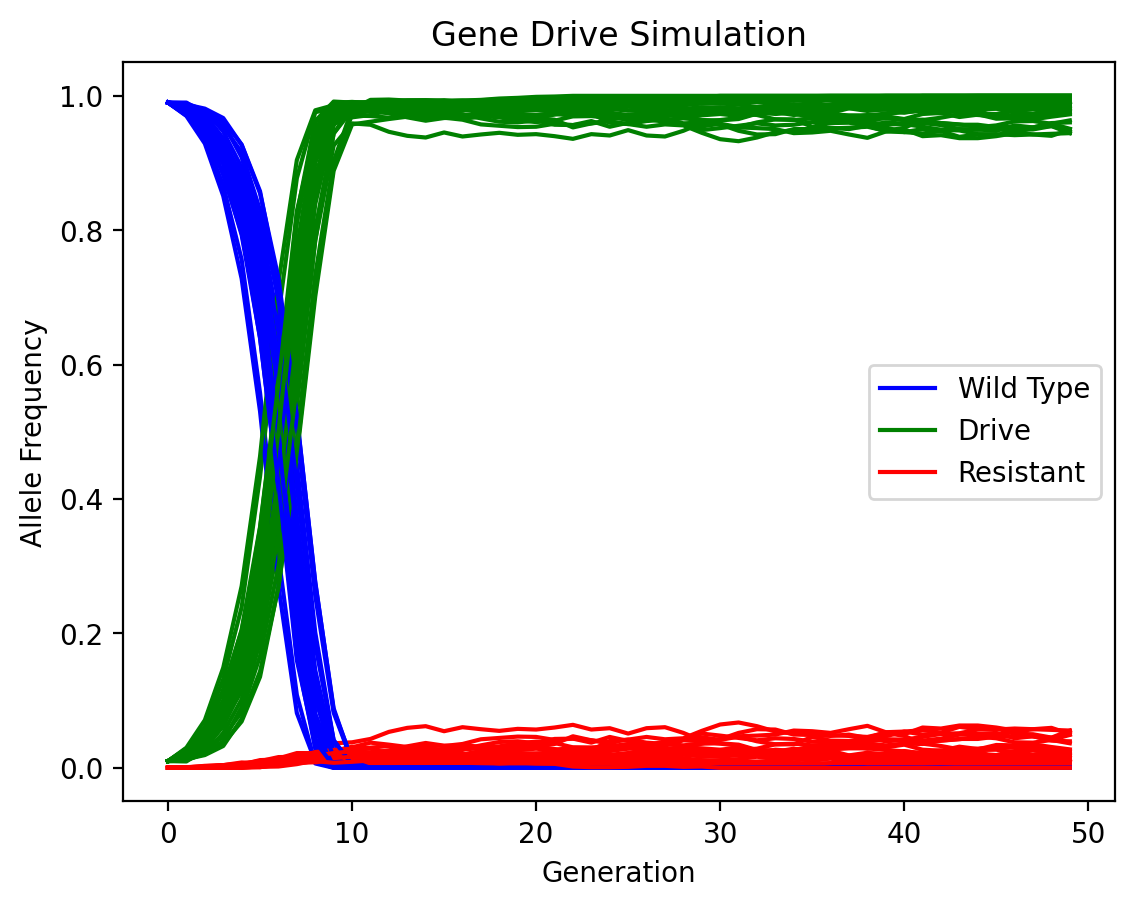

In [23]:
import matplotlib.pyplot as plt
# The line below just changes the color scheme when plotting data
%config InlineBackend.figure_format='retina'
import random

#random.seed(46)

# Copy and paste the cutAndRepair, nextGeneration, countSym, and trialFreqs functions here.
# Takes as input a pair "DW" or "WD" and simulates the CRISPR cut-and-repair
# process. It returns "DD" with probability probHDR and otherwise returns "DR"
def nextGeneration(population, probHDR):
  nextGen = []
  # Add your code below!
  for _ in list(range(len(population))):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    allele1 = random.choice(parent1)
    allele2 = random.choice(parent2)
    output = allele1 + allele2

    if output == "DW" or output == "WD":
      output = cutAndRepair(output, probHDR)

    nextGen.append(output)
  return nextGen

# Performs a trial of numGens generations of the gene drive and
# returns the population that results after numGens generations
def trial(population, probHDR, numGens):
  for _ in range(numGens):
    population = nextGeneration(population, probHDR)
  return population

# Counts how many times a symbol appears in a list of organisms.
def countSym(symbol, list):
  total = 0
  for organism in list:
    total = total + organism.count(symbol)
  return total


# Write the contract for trialFreqs here, and then the code for trialFreqs below.
def trialFreqs(population, probHDR, numGens):
  wildFrequencies = []
  driveFrequencies = []
  resistFrequencies = []
  numAlleles = 2 * len(population)
  # Add your code below
  for _ in range(numGens):
    w = countSym("W", population) / numAlleles
    d = countSym("D", population) / numAlleles
    r = countSym("R", population) / numAlleles

    wildFrequencies.append(w)
    driveFrequencies.append(d)
    resistFrequencies.append(r)

    population = nextGeneration(population, probHDR)

  return wildFrequencies, driveFrequencies, resistFrequencies

# Runs trials of the simulation and plots frequencies of W,D,R across generations.
def experiment(population, probHDR, numGens, numTrials):
  for i in range(numTrials):
    wildFrequencies, driveFrequencies, resistFrequencies = trialFreqs(population = population, probHDR = probHDR, numGens = numGens)
    # The next three lines will plot the three frequency lists each time they're created:
    # Green is wild-type allele frequency
    # Red is drive allele frequency
    # Blue is resist allele frequency
    plt.plot(wildFrequencies, color = "b")
    plt.plot(driveFrequencies, color = "g")
    plt.plot(resistFrequencies, color = "r")

  # The lines below is for the x-axis label, y-axis label, and title:
  plt.xlabel("Generation")  # Add the appropriate label for the x-axis
  plt.ylabel("Allele Frequency")  # Add the appropriate label for the y-axis
  plt.title("Gene Drive Simulation")

  # The next four lines make the plot legend with labels; DON'T change them!
  plt.plot([], color = "b", label = "Wild Type")
  plt.plot([], color = "g", label = "Drive")
  plt.plot([], color = "r", label = "Resistant")
  plt.legend()
  plt.show()

population = ["DD"] * 10 + ["WW"] * 990
experiment(population = population, probHDR = 0.98, numGens = 50, numTrials = 30)

**Part 15**

We now return to Diminutive Island which has been sponsoring our research.

The island has a population of 1000 mice 🐁 whose wild type "W" allele allows them to transmit a disease to humans. Health officials 🧑 estimate that **the prevalence (frequency) of the drive allele must be above 80% (0.8) in order for the disease to be controlled.**

It's expensive to engineer homozygous mice with the drive allele, so the health authorities would like to minimize the number of such mice that need to be introduced into the population in order to reach their 80% target within **50 generations.**

Assume that the carrying capacity of the island is 1000. So, for example, if you wish to introduce 100 gene drive mice, we'll replace 100 of the wild mice (by catching and removing them) with 100 drive mice. **The total number of "DD" and "WW" mice in the beginning population will be exactly 1000.**

Use your simulation to address the questions below. In addressing these questions, use **30 trials** each time you simulate. Make sure to remove or comment out `random.seed(46)` so that you get "better" randomness.

   1.  Athena Labs has developed an engineered drive allele with efficiency 0.9. They believe that with this efficiency, they can release just 10 engineered mice (the other 990 will be the original WW mice). Based on your simulation, does it seem likely that releasing 10 engineered mice will suffice to meet the requirements that at least 80% of the alleles in the population are D after 50 generations?
   
   <font color="SteelBlue">**In almost every trial, the drive spreads above 80%, meaning 10 engineered mice is almost always going to be enough. **</font>

   2.  Sagehen Labs has developed a different less expensive drive allele with an efficiency of only 0.7? With the given budget, they can afford to engineer 50 DD mice (so there will be 950 WW mice initially). Over the 30 trials in your simulation, what is the _smallest_ fraction of D alleles that you observe in this scenario after 50 generations? If we use that minimum for our decision making, will the Sagehen plan allow us to reliably meet the requirements that at least 80% of the alleles in the population are D after 50 generations?
   
   <font color="SteelBlue">**Even though some trials reach 80%, many do not, meaning it is not likely that it will consistently meet the target.**</font>

## Submit your assignment!

Congratulations! Please submit HW6 on Canvas.


